In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Missing colon in file PosixPath('/Users/kriarm/.matplotlib/stylelib/gadfly.mplstyle'), line 617 ('view raw')
Missing colon in file PosixPath('/Users/kriarm/.matplotlib/stylelib/gadfly.mplstyle'), line 618 ('matplotlibrc hosted with ❤ by GitHub')


In [4]:
sns.set_style("white")
plt.style.use('gadfly')

# Pomen Slovencev v tujini za slovenski turizem

Število udeležencev v raziskavi: 167

Spodnje vizualizacije

In [5]:
fname = "/users/kriarm/project/slotour/data/slotour_resp.tsv"

df = pd.read_csv(fname, sep="\t", header=0)

# rename columns to shorter forms
new_cols = {'Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo ali priporočili znamenitosti, aktivnosti, nastanitve, restavracije itd., ko so se že odločili za potovanje v Slovenijo in vas vprašali za priporočilo?': "n_rec",
            "Približno koliko ljudi je Slovenijo obiskalo zaradi vašega predloga, odkar ste prvič odšli v tujino? ": "n_incoming",
            "Kakšni so najpogostejši nameni obiska Slovenije tujcev, s katerimi ste se pogovarjali o njihovem potovanju v Slovenijo?": "purposes",
            "Obisk katerih regij jim najpogosteje predlagate?": "regions",
            'Kakšni so vaši predlogi za turistično manj znane lokacije (npr. Bled, Ljubljana in Piran so že na seznamu vsakega turista)?': "less_known",
            "Lahko delite z nami razloge, zakaj promovirate lepote Slovenije z vašo mrežo v tujini?": "why_promote",
            "V kateri/-h državi/-ah v tujini ste do sedaj živeli?": "countries",
            "Koliko let že prebivate ali ste prebivali v tujini?": "years_abroad",
            "Ali ste član/ica društva VTIS? ": "ismember",
            "Imate še kakšen dodaten komentar, idejo?": "comment"}

df = df.rename(columns=new_cols)

In [6]:
value_map1 = {"0": 0, "1-5": 1, "6-15": 2, "16-30": 3, "31+": 4}
df.n_rec = df.n_rec.replace(value_map1.keys(), value_map1.values())

value_map2 = {"0": 0, "1-10": 1, "11-30": 2, "31-50": 3, "51-100": 4, "101-200": 5, "200+": 6}
df.n_incoming = df.n_incoming.replace(value_map2.keys(), value_map2.values())

years_abroad_map = {"Manj kot 1": 0, '1-3': 1, '3-5': 2, '5-10': 3, 'Več kot 10 let': 4}
df.years_abroad = df.years_abroad.replace(years_abroad_map.keys(), years_abroad_map.values())

ismember_map = {"Redni član/-ica": "Član/-ica", "Izredni član/-ica": "Član/-ica"}
df.ismember = df.ismember.replace(ismember_map.keys(), ismember_map.values())

In [7]:
# save the dataframe
df.to_csv("./data/slotour_resp_clean.tsv", sep="\t")

In [33]:
# get counts and compute percents and format as text for annotation
dat = None
dat = pd.DataFrame(df.groupby("years_abroad").size(), columns=["counts"])
dat["perc"] = ((dat["counts"]/len(df))*100).round(decimals=1)
dat["text"] = dat.perc.apply(lambda x: f"{x}%") + dat.counts.apply(lambda x: f" ({x})")

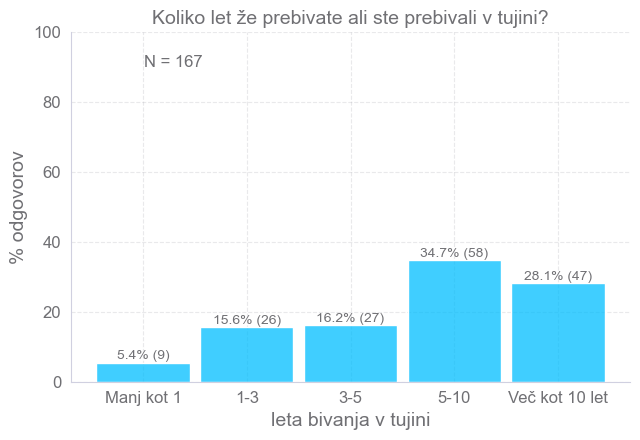

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 4.5))

ax = sns.histplot(df,
                  ax=ax,
                  x='years_abroad',
                  discrete=True,
                  multiple='dodge',
                  shrink=0.9,
                  common_norm=False,
                  legend=True,
                  stat='percent',
                  edgecolor='w')

ax.set_xticks(ticks=list(years_abroad_map.values()), labels=years_abroad_map.keys())

ax.set(ylabel="% odgovorov", xlabel="leta bivanja v tujini")
ax.set_title(label="Koliko let že prebivate ali ste prebivali v tujini?",
             ha="center",
             fontsize=14)
ax.set_ylim([0, 100])
ax.annotate(text=f"N = {len(df)}", xy=[ax.get_xlim()[0]*-0.01, 90], fontsize=12)
for i, v in enumerate(dat.text.tolist()):
    ax.text(x=ax.get_xticks()[i], y=dat.perc[i]+1, s=v, ha="center")

#sns.move_legend(ax, loc='upper right', title="")
plt.tight_layout()
sns.despine()

In [37]:

ax.get_yticks()


array([  0.,  20.,  40.,  60.,  80., 100.])

In [23]:
df.apply?

Signature:
df.apply(
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None,
    args=(),
    **kwargs,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray object:

    * ``False`` : passes each row or column 

## 1. Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo?

Polno izpisano vprašanje v anketi:  Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo ali priporočili znamenitosti, aktivnosti, nastanitve, restavracije itd., ko so se že odločili za potovanje v Slovenijo in vas vprašali za priporočilo?  


In [130]:
groups = ["ismember", "n_rec"]
ismember_count = df.groupby("ismember")["n_rec"].transform("sum")
dat_count = df.groupby(groups).agg({"n_rec": "count"})
dat_total = df.groupby("ismember").agg({"n_rec": "count"})
dat_count['perc'] = (dat_count.div(dat_total, level="ismember")*100).round(decimals=0).astype(int)
dat_count['text'] = dat_count.perc.apply(lambda x: f"{x}%") + dat_count.n_rec.apply(lambda x: f"\n({x})")

n_rec  perc       text
ismember        n_rec                        
Nisem član/-ica 0          2     5    5%\n(2)
                1         17    41  41%\n(17)
                2         16    39  39%\n(16)
                3          5    12   12%\n(5)
                4          1     2    2%\n(1)
Član/-ica       0          1     1    1%\n(1)
                1         52    41  41%\n(52)
                2         50    40  40%\n(50)
                3         13    10  10%\n(13)
                4         10     8   8%\n(10)

[ 0.225  1.225  2.225  3.225  4.225 -0.225  0.775  1.775  2.775  3.775]


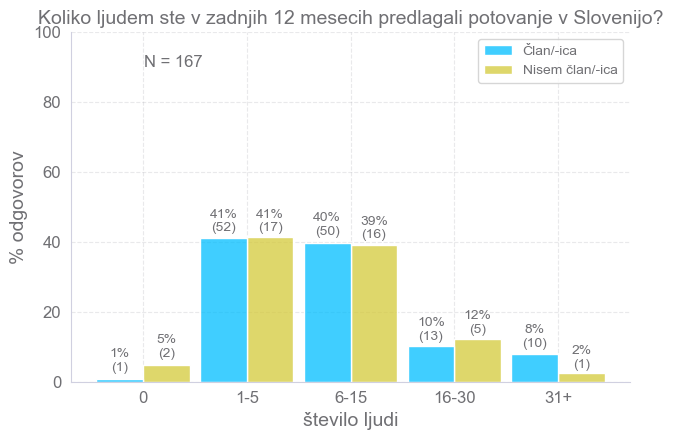

In [140]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 4.5))
shrinkage = 0.9
ax = sns.histplot(df,
                  ax=ax,
                  x='n_rec',
                  hue='ismember',
                  discrete=True,
                  multiple='dodge',
                  shrink=shrinkage,
                  binwidth=1,
                  common_norm=False,
                  legend=True,
                  stat='percent',
                  edgecolor='w',
                  label="Test")

ax.set(ylabel="% odgovorov", xlabel="število ljudi")
ax.set_title(label="Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo?",
             ha="center",
             fontsize=14)
ax.set_xticks(ticks=list(value_map1.values()), labels=value_map1.keys())
ax.set_ylim([0, 100])
ax.annotate(text=f"N = {len(df)}", xy=[ax.get_xlim()[0]*-0.01, 90], fontsize=12)
xloc = np.tile(ax.get_xticks(), 2).astype(float)
xloc[0:5] = xloc[0:5] + shrinkage/4
xloc[5::] = xloc[5::] - shrinkage/4
print(xloc)
for i, v in enumerate(dat_count.text.tolist()):

    ax.text(x=xloc[i], y=dat_count.perc[i]+2, s=v, ha="center")

sns.move_legend(ax, loc='upper right', title="")
plt.tight_layout()
sns.despine()

plt.savefig("./fig/recs.png")

## 2. Približno koliko ljudi je Slovenijo obiskalo zaradi vašega predloga, odkar ste prvič odšli v tujino?

In [209]:
groups = ["ismember", "n_incoming"]
dv = "n_incoming"
dat_count = df.groupby(groups).agg({dv: "count"})

# add categories that have not occured just for plotting
dat_count.loc[('Nisem član/-ica', 3), "n_incoming"] = 0
dat_count.loc[('Nisem član/-ica', 5), "n_incoming"] = 0
dat_count.n_incoming = dat_count.n_incoming.astype(int)
dat_count = dat_count.sort_index()

# compute counts and format percentages
dat_total = df.groupby("ismember").agg({dv: "count"})
dat_count['perc'] = (dat_count.div(dat_total, level="ismember")*100).round(decimals=0).astype(int)
dat_count['text'] = dat_count.perc.apply(lambda x: f"{x}%") + dat_count[dv].apply(lambda x: f"\n({x})")

n_incoming  perc       text
ismember        n_incoming                             
Nisem član/-ica 0                    3     7    7%\n(3)
                1                   29    71  71%\n(29)
                2                    7    17   17%\n(7)
                3                    0     0    0%\n(0)
                4                    1     2    2%\n(1)
                5                    0     0    0%\n(0)
                6                    1     2    2%\n(1)
Član/-ica       0                   10     8   8%\n(10)
                1                   76    60  60%\n(76)
                2                   27    21  21%\n(27)
                3                    3     2    2%\n(3)
                4                    5     4    4%\n(5)
                5                    2     2    2%\n(2)
                6                    3     2    2%\n(3)

[ 0.225  1.225  2.225  3.225  4.225  5.225  6.225 -0.225  0.775  1.775
  2.775  3.775  4.775  5.775]


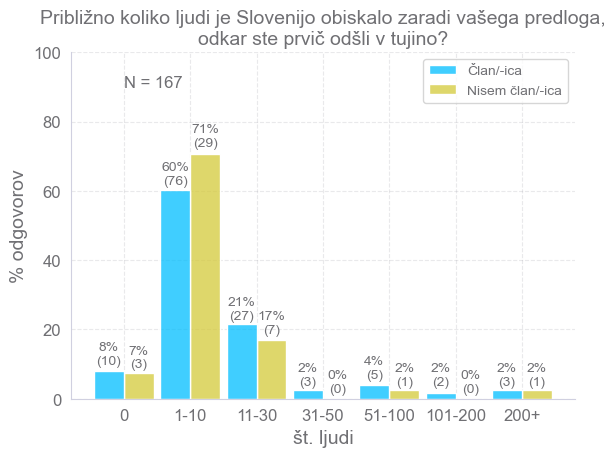

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 4.5))
shrinkage = 0.9
sns.histplot(df, 
             ax=ax,
             x='n_incoming',
             hue='ismember',
             discrete=True,
             multiple='dodge',
             binwidth=1,
             shrink=shrinkage,
             common_norm=False,
             legend=True,
             stat='percent',
             edgecolor='w')

ax.set(ylabel="% odgovorov",
       xlabel="št. ljudi")
ax.set_title(label="Približno koliko ljudi je Slovenijo obiskalo zaradi vašega predloga,\nodkar ste prvič odšli v tujino?",
             fontsize=14)
ax.set_xticks(ticks=list(value_map2.values()), labels=value_map2.keys())
ax.set_ylim([0, 100])
xloc = dat_count.index.get_level_values("n_incoming").to_numpy().astype(float)

half=len(dat_count)//2
xloc[0:half] = xloc[0:half] + shrinkage/4
xloc[half::] = xloc[half::] - shrinkage/4

print(xloc)
for i, v in enumerate(dat_count.text.tolist()):
    ax.text(x=xloc[i], y=dat_count.perc[i]+2, s=v, ha="center")

ax.annotate(text=f"N = {len(df)}", xy=[ax.get_xlim()[0]*-0.01, 90], fontsize=12)
sns.move_legend(ax, loc='upper right', title="")
sns.despine()
plt.savefig("./fig/obiski.png")

## Drzave bivanja

In [50]:
scandinavia = ["Norveska", "Norveška", "Svedska", "Švedska", "Danska"]
typos = {
    "Grcija": "Grčija", 
    "Cile": "Čile", 
    "Urugay": "Urugvaj",
    "argentina": "Argentina",
    "srbija": "Srbija",
    "Nova zelandija": "Nova Zelandija",
        }

d = []
for e in x:
    e = e.strip()
    if e in typos.keys():
        e = typos[e]
    elif e in scandinavia:
        e = "Skandinavija"
    d.append(e)

In [51]:
df2 = pd.DataFrame(d, columns=["countries"]).groupby('countries').size().sort_values(ascending=False)
df2 = pd.DataFrame(df2, columns=["count"])

# count those with count <2
other = len(df2.loc[df2["count"] < 2, :])
other_list = df2.loc[df2["count"] < 2, :].index.tolist()

In [52]:
# only show contries with > 2 counts
df2 = df2.loc[df2["count"] > 2, :]
df2['countries'] = df2.index
df2 = pd.concat([df2, pd.DataFrame({"count": [other], "countries": ["drugo"]})]).sort_values(by="count", ascending=False)

Kategorija "drugo" zajema odgovore:   

In [574]:
print(f"{', '.join(other_list)}")

vec drzav v Afriki, Tajvan, vec drzav na Bliznjem Vzhodu, Balkan, Urugvaj, Ukrajina, Čile, Ciper, Singapur, Rusija, Poljska, Brazilija, Nova Zelandija, Madžarska, Litva, Kenija, Grčija, Ghana, Peru


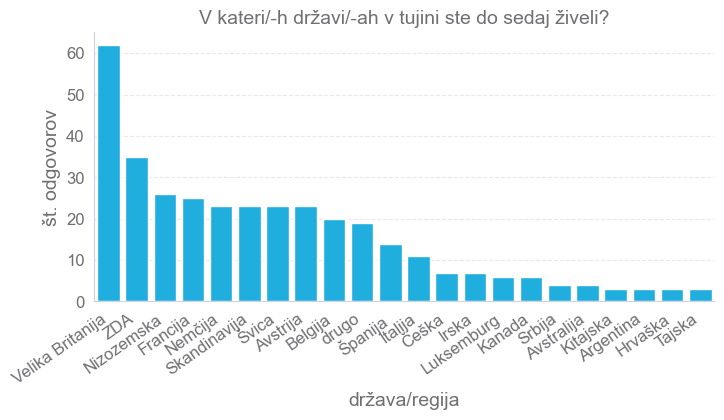

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3.5))
color1 = np.asarray([0, 190, 255])/255 #00BEFF
sns.barplot(df2, 
            ax=ax,
            x='countries',
            y='count',
            color=color1,
            edgecolor='w')

ax.set(ylabel="št. odgovorov", 
       xlabel="država/regija")
ax.set_title(label="V kateri/-h državi/-ah v tujini ste do sedaj živeli?", 
             fontsize=14)
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=35, ha='right')
sns.despine()
plt.savefig("./fig/countries.png")

## 4. Stevilo obiskov glede na drzavo bivanja

Opombe: 
- nekateri udeleženci so navajali regije in ne države (e.g. Skandinavija). V tem primeru smo navajali regije (npr. odgovor "Norveška" smo šteli v odgovor "Skandinavija")
- histogram prikazuje le odgovore, ki so se v vzorcu pojavili več kot 2x

In [468]:
# extract countries, number of visits and years abroad
countries = [e.split(", ") for e in df.countries.to_numpy()]
subs = [f"s{i+1:03}" for i in range(len(df))]
visits = df.n_incoming.to_list()
tabroad = df.years_abroad.to_list()
ismember = df.ismember.to_list()

# create data frame
dat = None
dat = pd.DataFrame(countries, columns=[f"{i+1}" for i in range(max([len(e) for e in countries]))])
dat["years_abroad"] = tabroad
dat["n_incoming"] = visits
dat["ismember"] = ismember
dat["sub"] = subs

In [469]:
# conver to long format
datlong = pd.melt(dat, id_vars=["sub", "years_abroad", "n_incoming", "ismember"], value_vars=[f"{i+1}" for i in range(8)], value_name="country", var_name="country_id")

In [470]:
# now count the countries so we can later filter by responses
tmp = datlong.groupby("country", as_index=False).size()
counts = {c: cnt for c, cnt in zip(tmp.country.tolist(), tmp["size"].tolist())}

datlong["n_samples"] = [int(counts[c]) if c is not None else None for c in datlong.country.tolist()]
datlong.head(5)

,sub,years_abroad,n_incoming,ismember,country_id,country,n_samples
0,s001,3,5,Član/-ica,1,Velika Britanija,62.0
1,s002,4,1,Član/-ica,1,Francija,25.0
2,s003,4,0,Član/-ica,1,Francija,25.0
3,s004,1,2,Član/-ica,1,Nizozemska,26.0
4,s005,3,2,Član/-ica,1,Švica,23.0


In [454]:
def get_weigths_values(dfin, iv):

    threshold = 15
    dftmp = dfin.loc[dfin.n_samples > threshold].sort_values(by="n_samples").groupby([iv, "n_incoming"], as_index=False).size()

    counts = None
    counts = dftmp.groupby(iv).agg({"size": "sum"})
    dftmp["total"] = np.nan

    for c, n in zip(counts.index.to_numpy(), counts["size"].to_numpy()):
        dftmp.loc[dftmp[iv]==c, "total"] = n

    dftmp["total"] = dftmp.total.astype(int)
    dftmp["weight"] = (dftmp["size"] / dftmp.total).round(decimals=2)
    dftmp["perc"] = dftmp.weight*100

    # set estimates for number of visits
    values = {0: 0, 1: 5, 2: 20, 3: 40, 4: 75, 5: 150, 6: 220}
    dftmp["estimates"] = dftmp.n_incoming.replace(values.keys(), values.values())
    dftmp.head(5)

    return dftmp

In [ ]:
# create a function that takes a dataframe grouped by a variable 
# and computes a weighted average of a variable
def weighted_average(df, value, weight):

    return (df[value] * df[weight]).sum() / df[weight].sum()

In [456]:
tmp2 = get_weigths_values(datlong, iv="country")

avg = pd.DataFrame(tmp2.groupby("country").apply(weighted_average, "estimates", "weight"), columns=["wavg"])
avg["country"] = avg.index
avg.wavg = avg.wavg.round(decimals=1)
avg = avg.sort_values(by="wavg", ascending=False)
avg.head(5)

,wavg,country
country,,
Nizozemska,28.0,Nizozemska
Belgija,25.5,Belgija
Francija,24.4,Francija
Avstrija,22.4,Avstrija
Švica,21.1,Švica


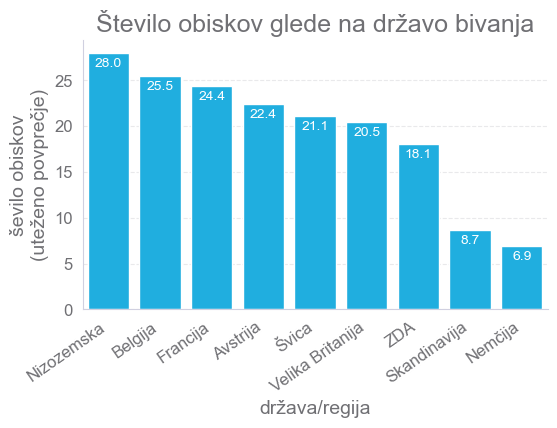

In [416]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))

sns.barplot(avg, ax=ax, y="wavg", x="country", edgecolor="w", color=color1)

ax.set_title("Število obiskov glede na državo bivanja")
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=35, ha='right')
ax.set_ylabel("ševilo obiskov\n(uteženo povprečje)")
ax.set_xlabel("država/regija")

for i, v in enumerate(avg.wavg.tolist()):
    ax.text(x=i, y=avg.wavg[i]-1.5, s=v, ha="center", color="w")

sns.despine()


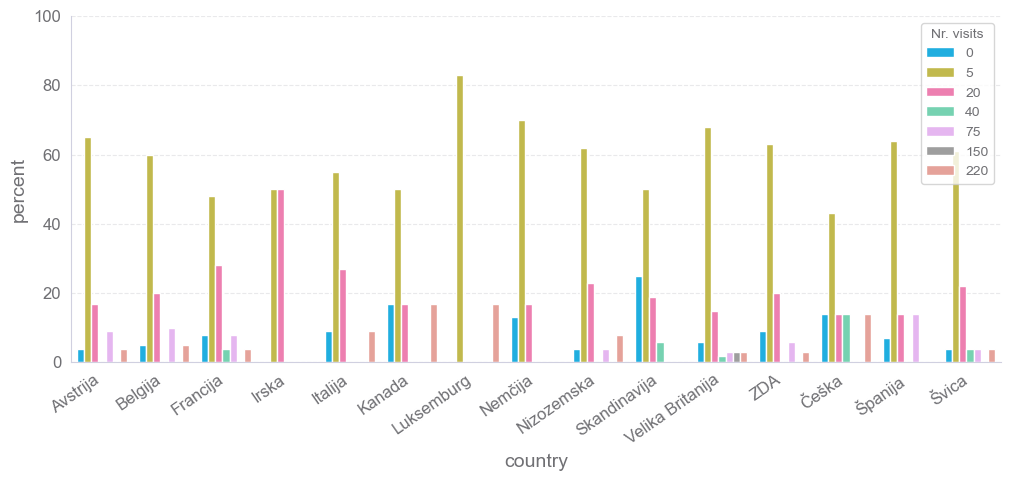

In [405]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4.5))
sns.barplot(ax=ax, data=tmp2, x="country", y="perc", hue="estimates", edgecolor="w")

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=35, ha='right')
ax.set_ylabel("percent")
ax.set_ylim([0, 100])
ax.legend(title="Nr. visits")
sns.despine()


# Število obiskov glede na leta bivanja v tujini

In [458]:
tmp3 = get_weigths_values(datlong, iv="years_abroad")

avg = pd.DataFrame(tmp3.groupby("years_abroad").apply(weighted_average, "estimates", "weight"), columns=["wavg"])
avg["years_abroad"] = avg.index
avg.wavg = avg.wavg.round(decimals=1)
avg.head(5)

,wavg,years_abroad
years_abroad,,
0,2.8,0
1,14.8,1
2,8.0,2
3,17.6,3
4,35.1,4


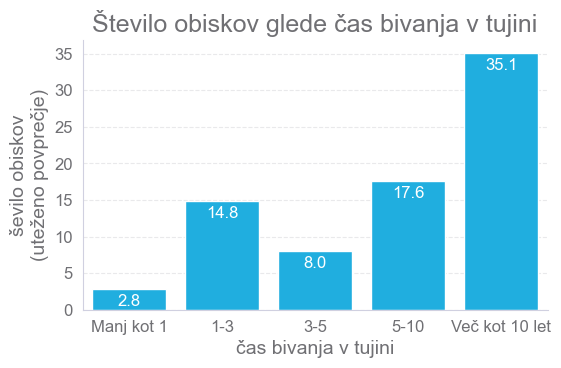

In [464]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))

sns.barplot(avg, ax=ax, y="wavg", x="years_abroad", edgecolor="w", color=color1)

ax.set_title("Število obiskov glede čas bivanja v tujini")
ax.set_xticks(ticks=ax.get_xticks(), labels=years_abroad_map.keys(), rotation=0, ha='center')
ax.set_ylabel("ševilo obiskov\n(uteženo povprečje)")
ax.set_xlabel("čas bivanja v tujini")

for i, v in enumerate(avg.wavg.tolist()):
    ax.text(x=i, y=avg.wavg[i]-2.3, s=v, ha="center", color="w", fontsize=12)

sns.despine()


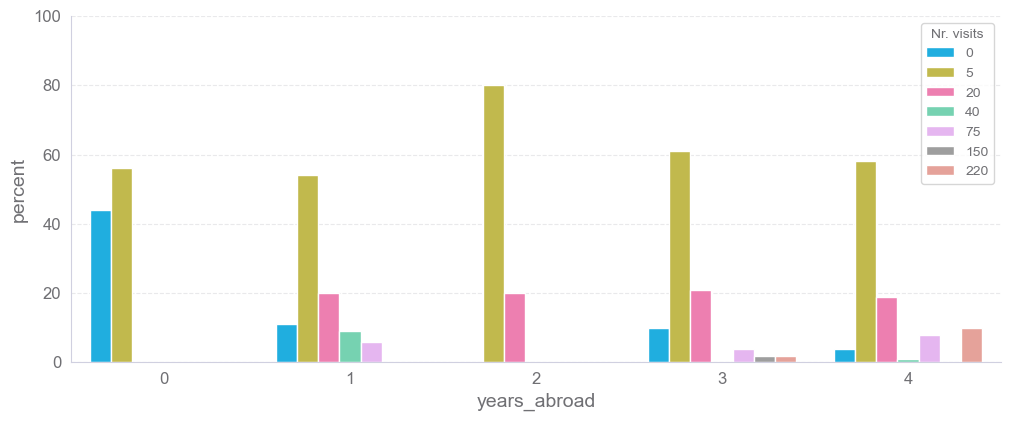

In [466]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4.5))
sns.barplot(ax=ax, data=tmp3, x="years_abroad", y="perc", hue="estimates", edgecolor="w")

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=0, ha='center')
ax.set_ylabel("percent")
ax.set_ylim([0, 100])
ax.legend(title="Nr. visits")
sns.despine()

## Število obiskov glede na članstvo

In [474]:
tmp4 = get_weigths_values(datlong, iv="ismember")
tmp3.head(5)
avg = pd.DataFrame(tmp4.groupby("ismember").apply(weighted_average, "estimates", "weight"), columns=["wavg"])
avg["ismember"] = avg.index
avg.wavg = avg.wavg.round(decimals=1)
avg.head(5)

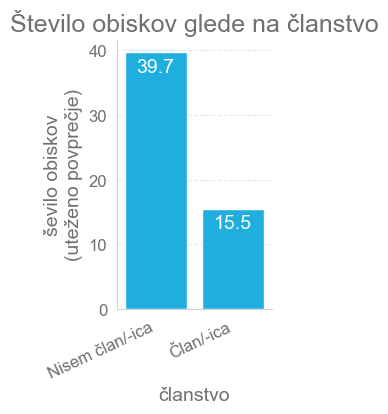

In [484]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 3.5))

sns.barplot(avg, ax=ax, y="wavg", x="ismember", edgecolor="w", color=color1)

ax.set_title("Število obiskov glede na članstvo")
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=25, ha='right')
ax.set_ylabel("ševilo obiskov\n(uteženo povprečje)")
ax.set_xlabel("članstvo")

for i, v in enumerate(avg.wavg.tolist()):
    ax.text(x=i, y=avg.wavg[i]-3, s=v, ha="center", color="w", fontsize=14)

sns.despine()

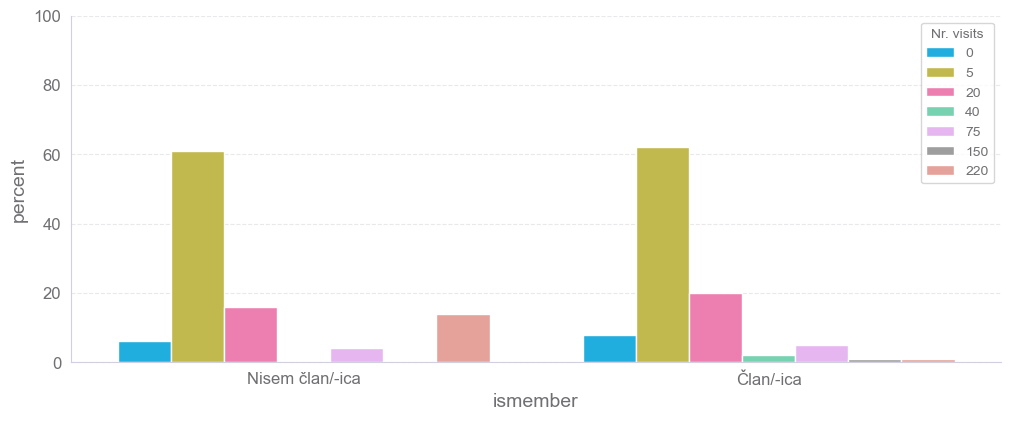

In [481]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4.5))
sns.barplot(ax=ax, data=tmp4, x="ismember", y="perc", hue="estimates", edgecolor="w")

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=0, ha='center')
ax.set_ylabel("percent")
ax.set_ylim([0, 100])
ax.legend(title="Nr. visits")
sns.despine()

# Katere regije so najbolj/najmanj promovirane?

In [644]:
regs = ", ".join([a for a in df.regions]).split(", ")

dat = []
dat = pd.DataFrame(np.array(regs), columns=["regs"])
df3 = pd.DataFrame(index=range(len(dat.value_counts())), columns=["name", "count"])
df3['name'] = [a[0] for a in dat.value_counts().index]
df3['count'] = dat.value_counts().values


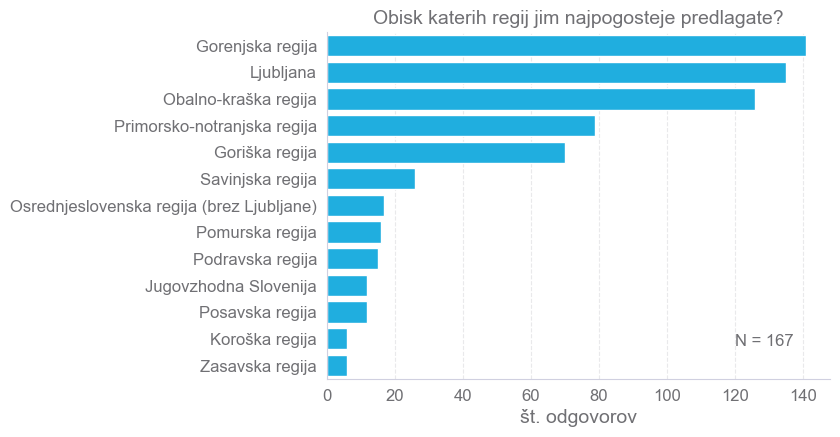

In [689]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 4.5))

sns.barplot(df3,
            x="count",
            y="name",
            ax=ax,
            color=color1,
            edgecolor='w')

ax.set(ylabel="",
       xlabel="št. odgovorov")
ax.set_title(label="Obisk katerih regij jim najpogosteje predlagate?",
             fontsize=14)

ax.annotate(text=f"N = {len(df)}", xy=[120, ax.get_ylim()[0]*0.9], fontsize=12)
sns.despine()

In [679]:
ax.get_ylim()

(12.5, -0.5)

## 4. Lahko delite z nami razloge, zakaj promovirate lepote Slovenije z vašo mrežo v tujini?

In [575]:
options = [
    "Ponosen/-na sem na Slovenijo",
    "Prepričan/-a sem, da bo tujcem v Sloveniji všeč",
    "Želim pomagati slovenskemu turizmu",
    "Samo, če me tujci vprašajo za priporočilo, jim predlagam, kam lahko grejo v Sloveniji",
    "Ne promoviram potovanj v Slovenijo",
]

In [576]:
# first find all given options and add a full stop afterwards (instead of comma)
a = []
for s in df.why_promote.to_list():
    for o in options:
        s = s.replace(o, o + ".")
    a.append(s)

# now find the fullstop-comma combination and replace with just a comma
tmp = [e.replace(".,", ".") for e in a]


In [577]:
# now split at fullstop and count
b = [e.split(".") for e in tmp]
c = [e.strip() for b2 in b for e in b2]
c = [e for e in c if e != ""]

In [578]:
df3 = pd.DataFrame(c, columns=["why"]).groupby("why").size().sort_values(ascending=False)
df3 = pd.DataFrame(df3, columns=["count"])
df3['why'] = df3.index
df3 = df3.loc[df3["count"] > 1, :]

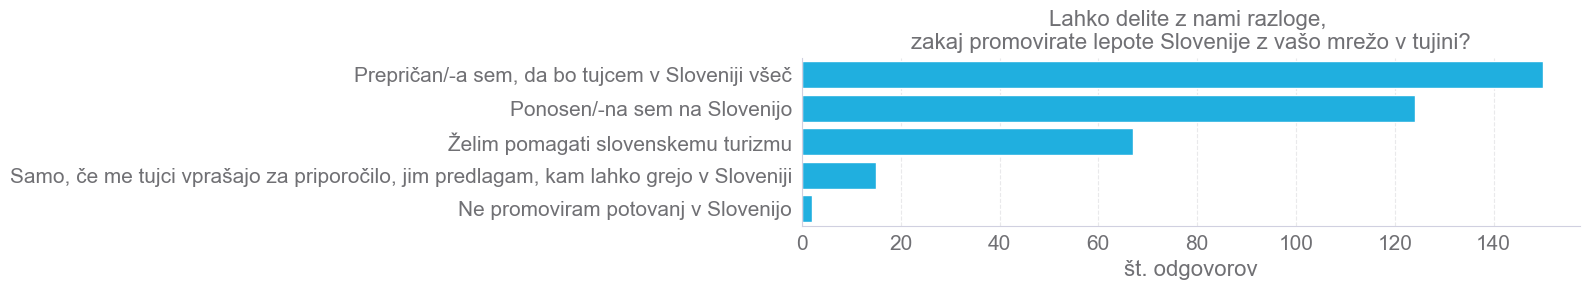

In [579]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 3))

sns.barplot(df3, 
            ax=ax,
            x='count',
            y='why',
            color=(0.00,0.75,1.00),
            edgecolor='w')

fs=16
ax.set_title(label="Lahko delite z nami razloge, \n" + \
                   "zakaj promovirate lepote Slovenije z vašo mrežo v tujini?",
             fontsize=fs) 
ax.set_ylabel(ylabel=""),
ax.set_xlabel(xlabel="št. odgovorov", fontsize=fs)
ax.tick_params(labelsize=15)
sns.despine()
plt.tight_layout()
plt.savefig("./fig/reasons.png")

# 5. Kakšni so vaši predlogi za turistično manj znane lokacije

work in progress ...

In [580]:
split_at = lambda x, mark: x.split(mark)
flatten_list = lambda l: [item for sublist in l for item in sublist]

In [581]:
t = flatten_list([s.split(", ") for s in df.less_known.tolist() if type(s) == str])

out1 = flatten_list(list(map(split_at, t, np.repeat("/", len(t)).tolist())))
out2 = flatten_list(list(map(split_at, out1, np.repeat(" in ", len(out1)).tolist())))

d = np.asarray([e.strip().lower() for e in out2])
d = np.unique(np.asarray(d))


In [582]:
mergethem = {

    "bohinjsko jezero": "bohinj",
    "bovec za rafting": "bovec",
    "center ljubljane": "ljubljana",
    "dolina reke soce: bovec": "bovec",
    "dolina soce": "dolina reke soče",
    "dolina soče": "dolina reke soče",
    "dolina soče (kobarid": "kobarid",
    "goriska brda ofc.": "goriška brda",
    "goriska brda": "goriška brda",

}

filterthem = [

    "etc.",
    "etc.)",
    "druge gorske destinacije",
    "ekoturizam",
    "gozd martuljek,kranjska gora ,soca",
    "grad",
    "gradovi",

]

addthem = [
    "gozd martuljek",
    "kranjska gora",
    "soča",
]
